In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install pmdarima

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 64.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=c14a4f14c696a6a174c1a55835246baed12d0fe5f5bd778901be9e0df57457b7
  Stored in directory: /root/.cache/pip/wheels/4

In [2]:
# display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

# 1. ARIMA

In [4]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
visadf = yf.download("V", start="2017-01-01", progress=False)
mastercarddf = yf.download("MA", start="2017-01-01", progress=False)
fiservdf = yf.download("FISV", start="2017-01-01", progress=False)
paypaldf = yf.download("PYPL", start="2017-01-01", progress=False)

In [5]:
amexdf.head(3)
visadf.head(3)
mastercarddf.head(3)
fiservdf.head(3)
paypaldf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781242,5853900
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925217,4635800
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050957,3383000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,78.760002,79.910004,78.489998,79.500000,76.844223,13785200
2017-01-04,79.440002,80.260002,79.360001,80.150002,77.472504,8033100
2017-01-05,80.339996,81.529999,80.220001,81.089996,78.381088,7805100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,104.410004,105.940002,104.110001,105.389999,102.280418,4711300
2017-01-04,105.339996,106.750000,104.860001,106.389999,103.250885,3299000
2017-01-05,107.050003,108.150002,106.459999,106.989998,104.048363,3262200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,53.41,53.845001,53.244999,53.669998,53.669998,2142600
2017-01-04,53.66,54.365002,53.654999,54.325001,54.325001,1359000
2017-01-05,54.23,54.590000,54.005001,54.305000,54.305000,1662400


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,40.290001,40.980000,40.000000,40.250000,40.250000,8247400
2017-01-04,40.349998,41.029999,40.044998,41.000000,41.000000,6806400
2017-01-05,41.430000,41.720001,41.040001,41.060001,41.060001,6432000


In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams["lines.linewidth"] = 5.0

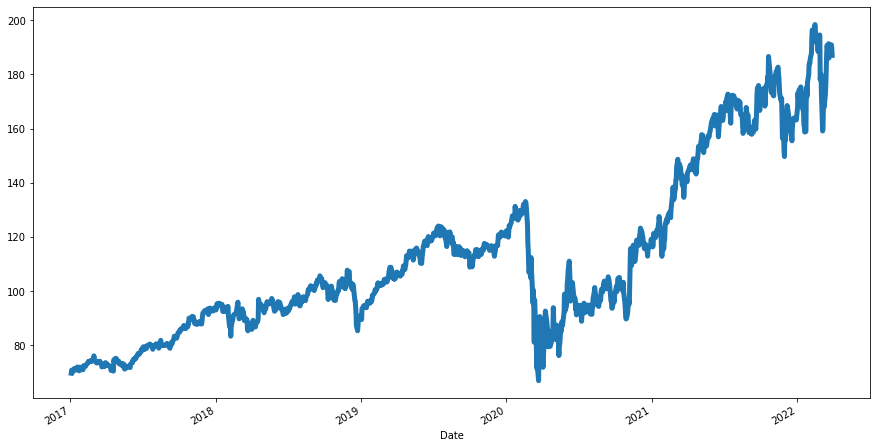

In [7]:
amexdf["Adj Close"].plot()

In [8]:
amexdf.isnull().sum().sum()

0

In [9]:
amexdf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1.321000e+03
mean,115.857328,117.029720,114.648759,115.845034,112.440586,3.893254e+06
std,30.072058,30.440633,29.695173,30.059099,31.508716,1.897977e+06
min,72.540001,75.419998,67.000000,68.959999,67.033676,7.070000e+05
25%,95.059998,96.269997,93.870003,95.180000,91.278633,2.738600e+06
50%,106.790001,107.800003,106.239998,106.779999,102.764793,3.361300e+06
75%,126.910004,128.000000,126.360001,127.150002,123.580154,4.423000e+06
max,197.500000,199.550003,197.240005,198.380005,198.380005,1.726170e+07


In [10]:
# ril_monthly_df = rildf.resample("1m").mean().sort_values(by="Date", ascending=False)
amex_monthly_df = amexdf.resample("1m").mean()
amex_monthly_df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,76.532000,77.120500,75.928000,76.501500,71.134927,5.195245e+06
2017-02-28,78.704211,79.168947,78.346842,78.858949,73.342335,3.464032e+06
2017-03-31,79.118261,79.640869,78.648260,79.076086,73.544287,4.291339e+06


In [11]:
# amex_monthly_df['Adj Close'].plot()

In [12]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12)
# figure = decomposition.plot()
# plt.show()

In [13]:
amexdf["Return"] = np.log(amexdf["Adj Close"]) - np.log(amexdf["Adj Close"].shift(1))
amexdf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781242,5853900,NaN
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925217,4635800,0.016261
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050957,3383000,-0.012403


In [14]:
amexdf.dropna(inplace=True)

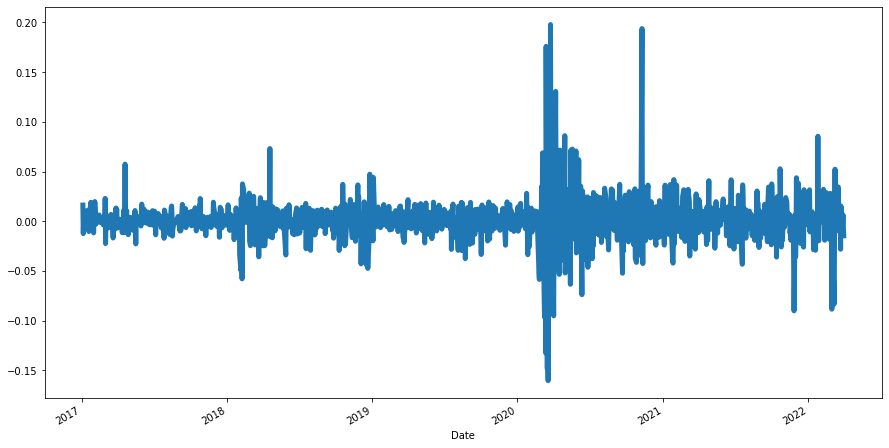

In [15]:
amexdf.Return.plot()

In [16]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12, model="multiplicative")
# figure = decomposition.plot()
# plt.show()

In [17]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(amexdf["Return"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(amexdf["Return"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(amexdf["Return"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(amexdf["Return"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (22296.138266181028, 0.0)
AndersonResult(statistic=48.80355706119781, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.4680825675922563, pvalue=1.1718506593989545e-265)
ShapiroWilkTest 0.8046603202819824 3.4639313310969456e-37


In [18]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(amexdf["Adj Close"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(amexdf["Adj Close"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(amexdf["Adj Close"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(amexdf["Adj Close"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (177.85491065203146, 0.0)
AndersonResult(statistic=47.41308113871219, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroWilkTest 0.900117039680481 1.747893128468191e-28


In [19]:
# from numpy.random import randn
# data = 5 * randn(100) + 5

In [20]:
# # Tests of Normality
# import scipy.stats as ss

# # Jarque–Bera Test
# statistic = ss.jarque_bera(data)
# print("JarqueBeraTest", statistic)

# # Anderson-Darling Normality Test
# statistic = ss.anderson(data)
# print(statistic)

# # Kolmogorov-Smirnov Test
# statistic = ss.kstest(data, 'norm')
# print(statistic)

# # Shapiro-Wilk Test
# statistic, pvalue = ss.shapiro(data)
# print(f"ShapiroWilkTest ({statistic}, {pvalue})")

In [21]:
# Tests of Stationarity
from statsmodels.tsa import stattools
from statsmodels.stats import diagnostic

# Augmented Dickey Fuller Test
statistic = stattools.adfuller(amexdf["Return"])
print("AugmentedDickeyFullerTest", statistic)

# Ljung-Box Test (test for auto-correlation)
statistic = diagnostic.acorr_ljungbox(amexdf["Return"], lags=[1])
print("LjungboxTest", statistic)

AugmentedDickeyFullerTest (-14.63775960702874, 3.6651084501260265e-27, 6, 1313, {'1%': -3.435340198430096, '5%': -2.863743768394356, '10%': -2.567943297315671}, -6303.007354372455)
LjungboxTest     lb_stat  lb_pvalue
1  8.974791   0.002737


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


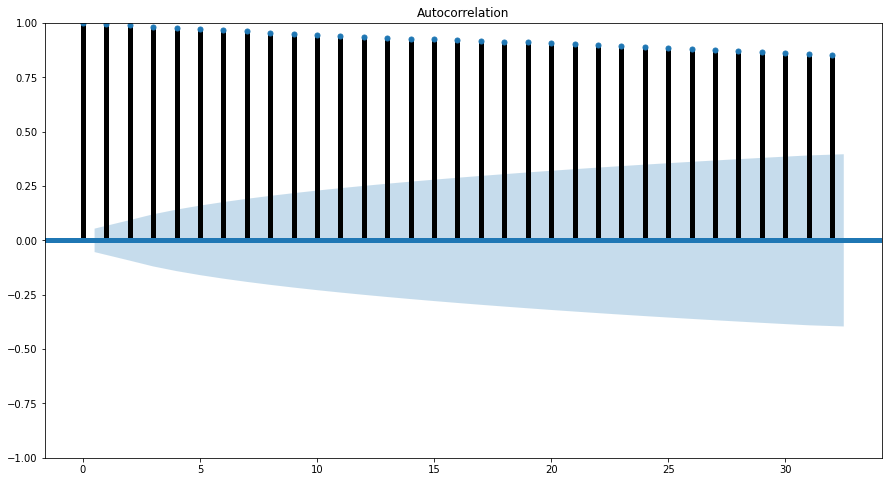

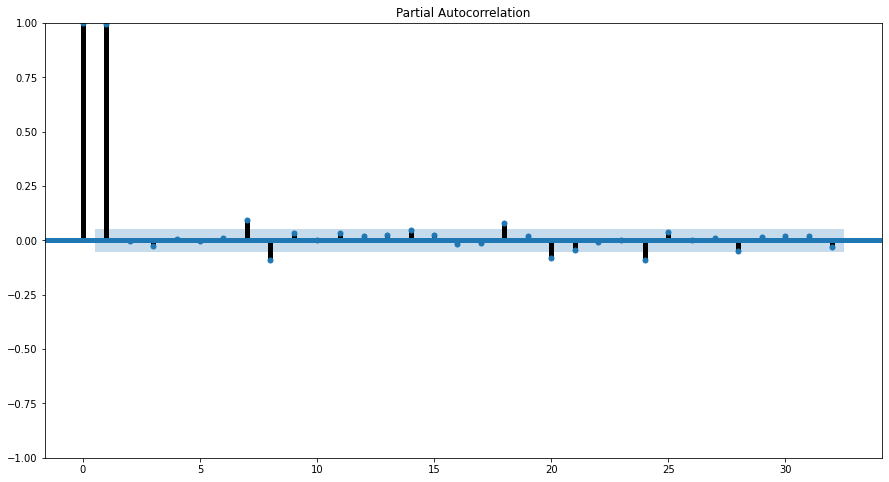

In [22]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(amexdf["Adj Close"])
pacf = sgt.plot_pacf(amexdf["Adj Close"])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


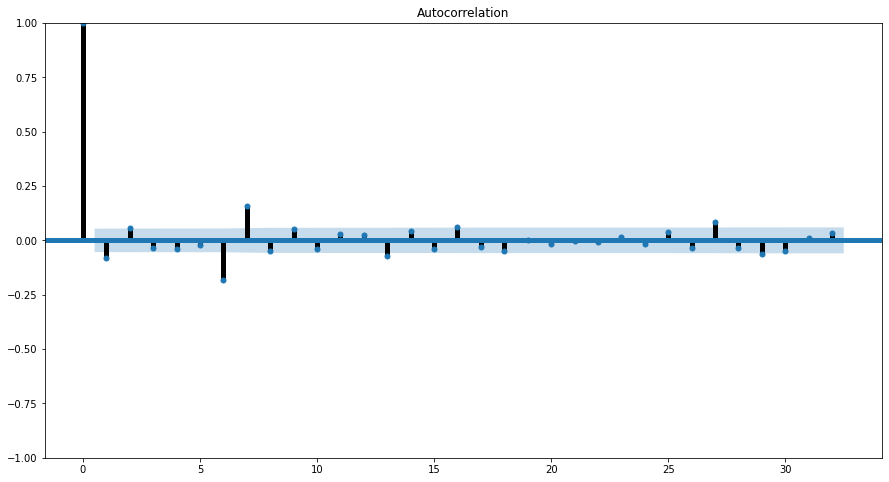

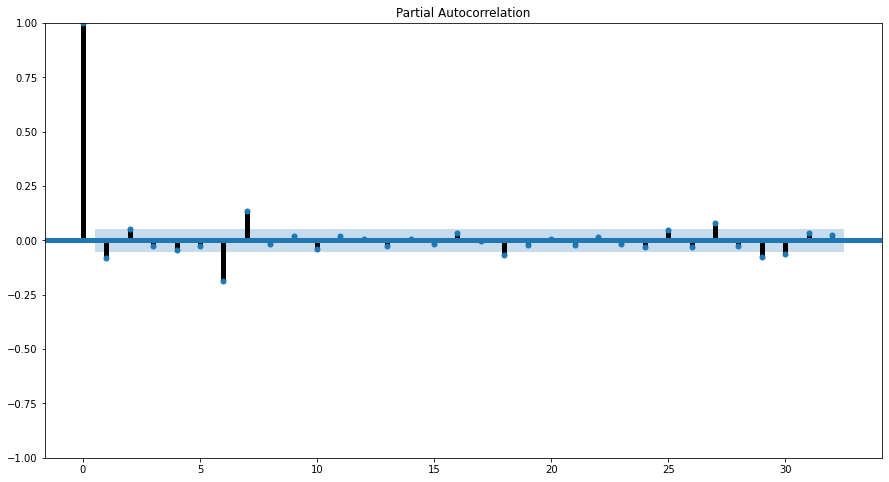

In [23]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(amexdf["Return"])
pacf = sgt.plot_pacf(amexdf["Return"])

In [24]:
# normal transformation
box_data, box_lambda = ss.boxcox(amexdf["Adj Close"])
yeo_data, yeo_lambda = ss.yeojohnson(amexdf["Return"])

print(f"old adjusted close skew: {ss.skew(amexdf['Adj Close'])} old kurtosis: {ss.kurtosis(amexdf['Adj Close'])}")
print(f"old return skew: {ss.skew(amexdf['Return'])} old kurtosis: {ss.kurtosis(amexdf['Return'])}")
print(f"box skew: {ss.skew(box_data)} old kurtosis: {ss.kurtosis(box_data)}")
print(f"yeo skew: {ss.skew(yeo_data)} old kurtosis: {ss.kurtosis(yeo_data)}")

old adjusted close skew: 0.8940512788833888 old kurtosis: -0.19082686164862084
old return skew: 0.7115416179088515 old kurtosis: 20.083803579409874
box skew: 0.06496660521632246 old kurtosis: -0.762668005445521
yeo skew: -0.15073125584641547 old kurtosis: 17.98943313671826


In [25]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(box_data)
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(box_data)
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(box_data, 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(box_data)
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (32.91998191369708, 7.10422577432368e-08)
AndersonResult(statistic=9.581490866933564, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.8631161575208195, pvalue=0.0)
ShapiroWilkTest 0.9694088101387024 4.3118654225299507e-16


In [26]:
# import pmdarima as pmd
# model = pmd.auto_arima(rildf["Return"], max_p=10, max_q=10, max_d=3, max_order=20)
# model.summary()
# import pmdarima as pmd
# yeo_model = pmd.auto_arima(yeo_data, max_p=10, max_q=10, max_d=3, max_order=20)
# yeo_model.summary()
# import pmdarima as pmd
# box_model = pmd.auto_arima(box_data, max_p=10, max_q=10, max_d=3, max_order=20)
# box_model.summary()
# model.predict(n_periods=10)
# infy_df.reset_index(inplace=True)

In [27]:
# cutoff_date = '2021-12-31'
# xtrain, xtest = amexdf.loc[amexdf.index <= cutoff_date], amexdf.loc[amexdf.index > cutoff_date]

In [28]:
import pmdarima as pmd

maxlen = len(amexdf)
forecast1 = []

for ii in range(30):
  train_model = pmd.auto_arima(amexdf[ii:ii+maxlen-30]["Adj Close"], max_p=5, max_q=5, max_d=2, max_order=11)
  train_model.fit(amexdf[ii:ii+maxlen-30]["Adj Close"])
  forecast1.append(train_model.predict(n_periods=1).item())


ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 5), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [29]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(amexdf[-30:]["Adj Close"], forecast1, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=5.31


In [30]:
# import pmdarima as pmd
# train_model = pmd.auto_arima(amexdf[:-30]["Adj Close"], max_p=10, max_q=10, max_d=3, max_order=20)
# train_model.fit(amexdf[:-30]["Adj Close"])
# train_model.summary()

In [31]:
# forecast1 = train_model.predict(n_periods=30)

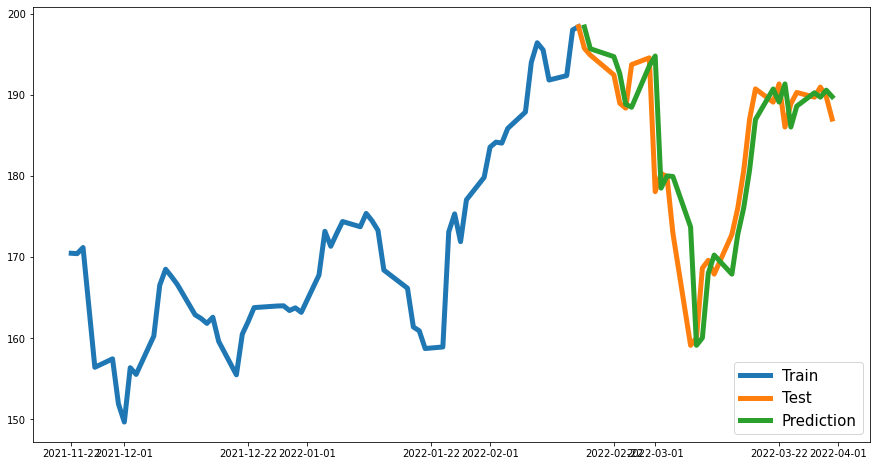

In [32]:
forecast1 = pd.DataFrame(forecast1, index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(amexdf[-90:-30]["Adj Close"], label="Train")
plt.plot(amexdf[-31:]["Adj Close"], label="Test")
plt.plot(forecast1, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [33]:
# xresiduals = xtest["Return"].values - forecast["Prediction"].values

In [34]:
# _ = sgt.plot_acf(xresiduals, lags=15)
# _ = sgt.plot_pacf(xresiduals, lags=15)


In [35]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit1 = ExponentialSmoothing(xtrain["Adj Close"], seasonal_periods=52, trend='mul', seasonal='mul')
# fit1 = fit1.fit()
# prediction = fit1.forecast(len(xtest)).copy()
# xresiduals = xtest["Adj Close"].values - prediction

In [36]:
# # fit1.params_formatted
# xtest.shape[0]/xtrain.shape[0]

In [37]:
# sgt.plot_acf(xresiduals, lags=15);
# sgt.plot_pacf(xresiduals, lags=15);

In [38]:
# prediction = pd.DataFrame(prediction.values, index = xtest.index, columns=['Prediction'])

In [39]:
# plt.plot(xtrain["Adj Close"], label="Train")
# plt.plot(xtest["Adj Close"], label="Test")
# plt.plot(prediction, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

In [40]:
# from sklearn.metrics import mean_squared_error

# rmse = mean_squared_error(xtest["Return"], forecast["Prediction"], squared=False)
# print(f"RMSE={rmse*100:.4f}%")

# 2. VAR

In [41]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [42]:
amexdf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781258,5853900
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925209,4635800
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050941,3383000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.94960,0.95550,0.9487,0.94994,0.94994,0
2017-01-03,0.95610,0.96640,0.9531,0.95602,0.95602,0
2017-01-04,0.95984,0.96234,0.9543,0.95970,0.95970,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2.511,2.518,2.448,2.450,2.450,0
2017-01-04,2.456,2.474,2.434,2.452,2.452,0
2017-01-05,2.439,2.443,2.346,2.368,2.368,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581007,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679941,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650728,3300


In [43]:
masterdf = pd.concat([amexdf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["amex price", "amazon price", "euro price", "treasury price", "inflation price"]
masterdf

,amex price,amazon price,euro price,treasury price,inflation price
Date,,,,,
2019-11-07,117.484978,1788.199951,0.903310,1.926,23.581007
2019-11-08,117.669022,1785.880005,0.907466,1.933,23.679941
2019-11-11,117.116859,1771.650024,0.907240,1.943,23.650728
2019-11-12,117.107170,1778.000000,0.906170,1.909,23.698776
2019-11-13,116.496880,1753.109985,0.908070,1.870,23.698776
...,...,...,...,...,...
2022-03-25,190.279999,3295.469971,0.908300,2.492,34.250000
2022-03-28,189.699997,3379.810059,0.910590,2.468,34.250000
2022-03-29,190.940002,3386.300049,0.909600,2.400,34.779999


In [45]:
from statsmodels.tsa.vector_ar.var_model import VAR

maxlen = len(masterdf)
forecast2 = []

for ii in range(30):
  df = masterdf[ii:ii+maxlen-30]
  train_model = VAR(df)
  result = train_model.select_order(maxlags=10)
  result = train_model.fit(maxlags=result.aic)
  lagged_Values = df.values[-result.k_ar:]
  forecast2.append(result.forecast(y=lagged_Values, steps=1)[0][0])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

In [46]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(masterdf[-30:]["amex price"], forecast2, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=5.47


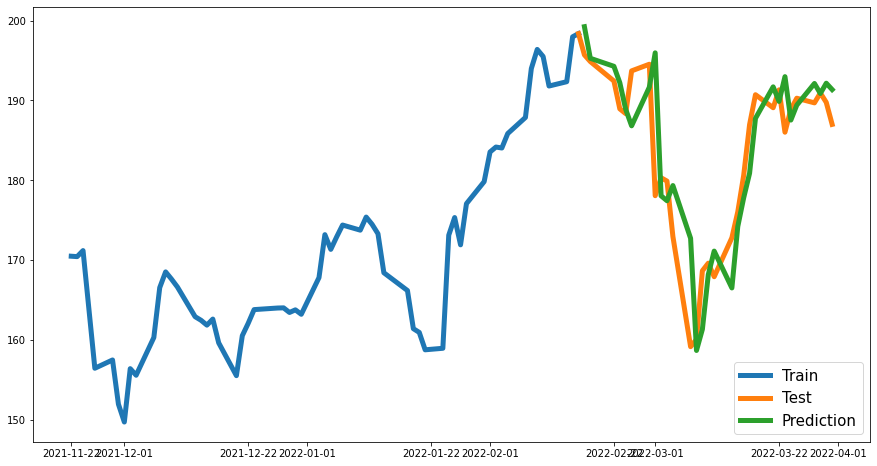

In [47]:
forecast2 = pd.DataFrame(forecast2, index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(amexdf[-90:-30]["Adj Close"], label="Train")
plt.plot(amexdf[-31:]["Adj Close"], label="Test")
plt.plot(forecast2, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [ ]:
# from statsmodels.tsa.vector_ar.var_model import VAR

# # masterdf = np.log(masterdf).diff(1).dropna()
# # masterdf
# model = VAR(masterdf[:-30])
# result = model.select_order(maxlags=10)
# result.summary()
# result = model.fit(maxlags=result.aic)
# # result.summary()
# lagged_Values = masterdf.values[-result.k_ar:]

# forecast2 = result.forecast(y=lagged_Values, steps=30) 
# forecast2 = pd.DataFrame(forecast2[:,0], index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])

# plt.plot(amexdf[-90:-29]["Adj Close"], label="Train")
# plt.plot(amexdf[-30:]["Adj Close"], label="Test")
# plt.plot(forecast2, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

# 3. Deep Learning - LSTM

In [ ]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
amexdf["Return"] = np.log(amexdf["Adj Close"]) - np.log(amexdf["Adj Close"].shift(1))
amexdf.dropna(inplace=True)
amexdf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925217,4635800,0.016261
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050972,3383000,-0.012403
2017-01-06,75.400002,75.919998,75.059998,75.470001,70.190468,3089600,0.001989


In [ ]:
import torch

def sliding_window(ts, window_size=10):
  X = []
  Y = []
  ts = ts.tolist()

  for ii in range(window_size+1, len(ts)+1):
    X.append(ts[ii-(window_size+1):ii-1])
    Y.append(ts[ii-1])

  return torch.Tensor(X), torch.Tensor(Y)

In [ ]:
xtrain, ytrain = sliding_window(amexdf["Return"])

In [ ]:
import torch
import torch.nn as nn

class GRU(nn.Module):
  def __init__(self, hidden_size, in_size=1, out_size=1):
    super(GRU, self).__init__()
    self.hidden_size = hidden_size
    self.gru = nn.GRU(
        input_size = in_size,
        hidden_size = hidden_size,
        batch_first = True
    )
    self.fc = nn.Linear(hidden_size, out_size)

  def forward(self, x, h):
    # h = torch.zeros(1, x.size(0), self.hidden_size)
    out, _ = self.gru(x, h)
    last_hidden_states = out[:, -1]
    out = self.fc(last_hidden_states)
    return out, last_hidden_states 

  def init_state(self, batch_size):
    hidden = next(self.parameters()).data.new(batch_size, self.hidden_size).zero_()
    return hidden


In [ ]:
hidden_size = 100
learning_rate = 0.0001
epochs = 500

In [ ]:
model = GRU(hidden_size = hidden_size)
model.train()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
losses = []
hidden = model.init_state(xtrain.size(0)-1)

for ii in range(1, epochs+1):
  hidden = hidden.data.unsqueeze(0)
  pred, hidden = model(xtrain[:-1,:].unsqueeze(2), hidden)
  loss = criterion(ytrain, pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

  if (ii%50 == 0):
    print(f"epoch: {ii}... loss: {losses[-1]}")

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([298, 1])) that is different to the input size (torch.Size([299])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 50... loss: 0.00031171090085990727
epoch: 100... loss: 0.0002764727978501469
epoch: 150... loss: 0.0002762599615380168
epoch: 200... loss: 0.0002762563817668706
epoch: 250... loss: 0.0002762547810561955
epoch: 300... loss: 0.00027625341317616403
epoch: 350... loss: 0.0002762523654382676
epoch: 400... loss: 0.00027625157963484526
epoch: 450... loss: 0.0002762509975582361
epoch: 500... loss: 0.00027625056100077927


In [ ]:
model.eval()

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
xtrain[-1, :].shape

torch.Size([10])

In [ ]:
with torch.no_grad():
  pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))

In [ ]:
xtrain[-1:, :].unsqueeze(2).shape

torch.Size([1, 10, 1])

In [ ]:
hidden[-1:, :].unsqueeze(0).shape

torch.Size([1, 1, 100])

In [ ]:
pred

tensor([[0.0010]])

In [ ]:
maxlen = len(rildf)
forecast = []

for ii in range(50):
  xtrain, ytrain = sliding_window(rildf[ii:ii+maxlen-50+1]["Return"])

  losses = []
  hidden = model.init_state(xtrain.size(0)-1)

  model.train()

  for ii in range(1, epochs+1):
    hidden = hidden.data.unsqueeze(0)
    pred, hidden = model(xtrain[:-1, :].unsqueeze(2), hidden)
    loss = criterion(ytrain, pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (ii%50 == 0):
        print(f"epoch: {ii}... loss: {losses[-1]}")

  model.eval()
  with torch.no_grad():
    pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
    forecast.append(pred)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([249, 1])) that is different to the input size (torch.Size([250])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 50... loss: 0.00025992377777583897
epoch: 100... loss: 0.0002599234285298735
epoch: 150... loss: 0.0002599232248030603
epoch: 200... loss: 0.000259923079283908
epoch: 250... loss: 0.0002599229628685862
epoch: 300... loss: 0.00025992284645326436
epoch: 350... loss: 0.00025992273003794253
epoch: 400... loss: 0.00025992258451879025
epoch: 450... loss: 0.0002599224972072989
epoch: 500... loss: 0.0002599224098958075


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002592596283648163
epoch: 100... loss: 0.00025925945374183357
epoch: 150... loss: 0.00025925939553417265
epoch: 200... loss: 0.0002592593082226813
epoch: 250... loss: 0.0002592592209111899
epoch: 300... loss: 0.000259259162703529
epoch: 350... loss: 0.00025925913359969854
epoch: 400... loss: 0.00025925907539203763
epoch: 450... loss: 0.0002592590462882072
epoch: 500... loss: 0.0002592590171843767


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00025858310982584953
epoch: 100... loss: 0.0002585827896837145
epoch: 150... loss: 0.00025858276057988405
epoch: 200... loss: 0.0002585827314760536
epoch: 250... loss: 0.0002585827314760536
epoch: 300... loss: 0.00025858270237222314
epoch: 350... loss: 0.00025858270237222314
epoch: 400... loss: 0.0002585826732683927
epoch: 450... loss: 0.0002585826732683927
epoch: 500... loss: 0.0002585826441645622


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002576416591182351
epoch: 100... loss: 0.00025764157180674374
epoch: 150... loss: 0.00025764157180674374
epoch: 200... loss: 0.00025764157180674374
epoch: 250... loss: 0.0002576416009105742
epoch: 300... loss: 0.00025764157180674374
epoch: 350... loss: 0.00025764157180674374
epoch: 400... loss: 0.0002576416009105742
epoch: 450... loss: 0.00025764157180674374
epoch: 500... loss: 0.00025764151359908283


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00026335095753893256
epoch: 100... loss: 0.0002633506082929671
epoch: 150... loss: 0.0002633505791891366
epoch: 200... loss: 0.0002633506082929671
epoch: 250... loss: 0.0002633506082929671
epoch: 300... loss: 0.00026335063739679754
epoch: 350... loss: 0.0002633506082929671
epoch: 400... loss: 0.00026335063739679754
epoch: 450... loss: 0.00026335063739679754
epoch: 500... loss: 0.0002633506082929671


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00026161709683947265
epoch: 100... loss: 0.00026161657297052443
epoch: 150... loss: 0.00026161657297052443
epoch: 200... loss: 0.00026161657297052443
epoch: 250... loss: 0.00026161657297052443
epoch: 300... loss: 0.00026161657297052443
epoch: 350... loss: 0.00026161657297052443
epoch: 400... loss: 0.00026161657297052443
epoch: 450... loss: 0.00026161657297052443
epoch: 500... loss: 0.00026161657297052443


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002601642336230725
epoch: 100... loss: 0.00026016394258476794
epoch: 150... loss: 0.00026016394258476794
epoch: 200... loss: 0.00026016394258476794
epoch: 250... loss: 0.00026016394258476794
epoch: 300... loss: 0.00026016394258476794
epoch: 350... loss: 0.00026016394258476794
epoch: 400... loss: 0.00026016394258476794
epoch: 450... loss: 0.00026016394258476794
epoch: 500... loss: 0.00026016394258476794


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024803573614917696
epoch: 100... loss: 0.00024803559063002467
epoch: 150... loss: 0.00024803559063002467
epoch: 200... loss: 0.00024803559063002467
epoch: 250... loss: 0.00024803559063002467
epoch: 300... loss: 0.00024803559063002467
epoch: 350... loss: 0.00024803559063002467
epoch: 400... loss: 0.00024803559063002467
epoch: 450... loss: 0.00024803559063002467
epoch: 500... loss: 0.00024803559063002467


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024727630079723895
epoch: 100... loss: 0.0002472752530593425
epoch: 150... loss: 0.0002472752530593425
epoch: 200... loss: 0.0002472752530593425
epoch: 250... loss: 0.0002472752530593425
epoch: 300... loss: 0.0002472752530593425
epoch: 350... loss: 0.0002472752530593425
epoch: 400... loss: 0.0002472752530593425
epoch: 450... loss: 0.00024727528216317296
epoch: 500... loss: 0.0002472752530593425


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024688831763342023
epoch: 100... loss: 0.0002468872698955238
epoch: 150... loss: 0.0002468872698955238
epoch: 200... loss: 0.0002468872698955238
epoch: 250... loss: 0.0002468872698955238
epoch: 300... loss: 0.0002468872698955238
epoch: 350... loss: 0.0002468872698955238
epoch: 400... loss: 0.0002468872698955238
epoch: 450... loss: 0.0002468872698955238
epoch: 500... loss: 0.00024688729899935424


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024535335251130164
epoch: 100... loss: 0.0002453529159538448
epoch: 150... loss: 0.0002453529159538448
epoch: 200... loss: 0.00024535288685001433
epoch: 250... loss: 0.0002453529159538448
epoch: 300... loss: 0.0002453529159538448
epoch: 350... loss: 0.0002453529159538448
epoch: 400... loss: 0.0002453529159538448
epoch: 450... loss: 0.00024535288685001433
epoch: 500... loss: 0.0002453529159538448


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.000243088070419617
epoch: 100... loss: 0.0002430880267638713
epoch: 150... loss: 0.00024308804131578654
epoch: 200... loss: 0.00024308801221195608
epoch: 250... loss: 0.00024308804131578654
epoch: 300... loss: 0.0002430880267638713
epoch: 350... loss: 0.0002430880267638713
epoch: 400... loss: 0.0002430880267638713
epoch: 450... loss: 0.00024308801221195608
epoch: 500... loss: 0.00024308801221195608


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024257162294816226
epoch: 100... loss: 0.0002425704151391983
epoch: 150... loss: 0.0002425704151391983
epoch: 200... loss: 0.0002425704151391983
epoch: 250... loss: 0.0002425704151391983
epoch: 300... loss: 0.00024257042969111353
epoch: 350... loss: 0.0002425704151391983
epoch: 400... loss: 0.0002425704151391983
epoch: 450... loss: 0.00024257042969111353
epoch: 500... loss: 0.00024257042969111353


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002427484723739326
epoch: 100... loss: 0.0002427468862151727
epoch: 150... loss: 0.00024274685711134225
epoch: 200... loss: 0.00024274685711134225
epoch: 250... loss: 0.00024274685711134225
epoch: 300... loss: 0.00024274685711134225
epoch: 350... loss: 0.00024274684255942702
epoch: 400... loss: 0.00024274685711134225
epoch: 450... loss: 0.00024274685711134225
epoch: 500... loss: 0.00024274684255942702


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024369322636630386
epoch: 100... loss: 0.0002436900103930384
epoch: 150... loss: 0.00024368999584112316
epoch: 200... loss: 0.00024368999584112316
epoch: 250... loss: 0.00024368999584112316
epoch: 300... loss: 0.00024368999584112316
epoch: 350... loss: 0.0002436900103930384
epoch: 400... loss: 0.0002436900103930384
epoch: 450... loss: 0.0002436900103930384
epoch: 500... loss: 0.0002436900103930384


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024415389634668827
epoch: 100... loss: 0.00024414603831246495
epoch: 150... loss: 0.0002441460092086345
epoch: 200... loss: 0.00024414603831246495
epoch: 250... loss: 0.00024414603831246495
epoch: 300... loss: 0.0002441460092086345
epoch: 350... loss: 0.00024414603831246495
epoch: 400... loss: 0.00024414603831246495
epoch: 450... loss: 0.00024414603831246495
epoch: 500... loss: 0.00024414603831246495


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024343935365322977
epoch: 100... loss: 0.00024343565746676177
epoch: 150... loss: 0.00024343564291484654
epoch: 200... loss: 0.00024343564291484654
epoch: 250... loss: 0.00024343564291484654
epoch: 300... loss: 0.00024343564291484654
epoch: 350... loss: 0.00024343564291484654
epoch: 400... loss: 0.00024343564291484654
epoch: 450... loss: 0.0002434356283629313
epoch: 500... loss: 0.0002434356283629313


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024345774727407843
epoch: 100... loss: 0.00024345571000594646
epoch: 150... loss: 0.000243455680902116
epoch: 200... loss: 0.00024345566635020077
epoch: 250... loss: 0.00024345571000594646
epoch: 300... loss: 0.00024345569545403123
epoch: 350... loss: 0.00024345569545403123
epoch: 400... loss: 0.00024345569545403123
epoch: 450... loss: 0.00024345569545403123
epoch: 500... loss: 0.00024345566635020077


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002442959521431476
epoch: 100... loss: 0.0002442955446895212
epoch: 150... loss: 0.0002442954864818603
epoch: 200... loss: 0.0002442954864818603
epoch: 250... loss: 0.0002442954864818603
epoch: 300... loss: 0.0002442954864818603
epoch: 350... loss: 0.0002442954864818603
epoch: 400... loss: 0.0002442954864818603
epoch: 450... loss: 0.0002442954864818603
epoch: 500... loss: 0.0002442954864818603


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024227060202974826
epoch: 100... loss: 0.00024226329696830362
epoch: 150... loss: 0.00024226326786447316
epoch: 200... loss: 0.00024226326786447316
epoch: 250... loss: 0.00024226325331255794
epoch: 300... loss: 0.00024226326786447316
epoch: 350... loss: 0.00024226326786447316
epoch: 400... loss: 0.0002422632387606427
epoch: 450... loss: 0.00024226326786447316
epoch: 500... loss: 0.00024226326786447316


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024207269598264247
epoch: 100... loss: 0.0002420650707790628
epoch: 150... loss: 0.0002420650707790628
epoch: 200... loss: 0.00024206505622714758
epoch: 250... loss: 0.00024206505622714758
epoch: 300... loss: 0.00024206505622714758
epoch: 350... loss: 0.00024206505622714758
epoch: 400... loss: 0.00024206505622714758
epoch: 450... loss: 0.00024206505622714758
epoch: 500... loss: 0.00024206505622714758


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024252923321910203
epoch: 100... loss: 0.00024252290313597769
epoch: 150... loss: 0.00024252287403214723
epoch: 200... loss: 0.00024252287403214723
epoch: 250... loss: 0.00024252287403214723
epoch: 300... loss: 0.00024252287403214723
epoch: 350... loss: 0.00024252288858406246
epoch: 400... loss: 0.00024252288858406246
epoch: 450... loss: 0.00024252288858406246
epoch: 500... loss: 0.00024252288858406246


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024220011255238205
epoch: 100... loss: 0.00024219660554081202
epoch: 150... loss: 0.0002421965909888968
epoch: 200... loss: 0.00024219657643698156
epoch: 250... loss: 0.0002421965909888968
epoch: 300... loss: 0.0002421965909888968
epoch: 350... loss: 0.0002421965909888968
epoch: 400... loss: 0.0002421965909888968
epoch: 450... loss: 0.00024219657643698156
epoch: 500... loss: 0.0002421965909888968


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002421919343760237
epoch: 100... loss: 0.00024219098850153387
epoch: 150... loss: 0.00024219097394961864
epoch: 200... loss: 0.00024219097394961864
epoch: 250... loss: 0.00024219097394961864
epoch: 300... loss: 0.00024219097394961864
epoch: 350... loss: 0.00024219097394961864
epoch: 400... loss: 0.00024219098850153387
epoch: 450... loss: 0.00024219097394961864
epoch: 500... loss: 0.00024219097394961864


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024204365035984665
epoch: 100... loss: 0.00024203563225455582
epoch: 150... loss: 0.00024203555949497968
epoch: 200... loss: 0.0002420355740468949
epoch: 250... loss: 0.0002420355740468949
epoch: 300... loss: 0.0002420355740468949
epoch: 350... loss: 0.0002420355740468949
epoch: 400... loss: 0.00024203558859881014
epoch: 450... loss: 0.00024203558859881014
epoch: 500... loss: 0.00024203558859881014


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024210500123444945
epoch: 100... loss: 0.00024210152332670987
epoch: 150... loss: 0.0002421014942228794
epoch: 200... loss: 0.0002421014942228794
epoch: 250... loss: 0.00024210147967096418
epoch: 300... loss: 0.00024210147967096418
epoch: 350... loss: 0.0002421014942228794
epoch: 400... loss: 0.0002421014942228794
epoch: 450... loss: 0.0002421014942228794
epoch: 500... loss: 0.0002421014942228794


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024762831162661314
epoch: 100... loss: 0.00024762589600868523
epoch: 150... loss: 0.0002476258669048548
epoch: 200... loss: 0.0002476258669048548
epoch: 250... loss: 0.0002476258669048548
epoch: 300... loss: 0.0002476258669048548
epoch: 350... loss: 0.0002476258669048548
epoch: 400... loss: 0.0002476258669048548
epoch: 450... loss: 0.0002476258669048548
epoch: 500... loss: 0.0002476258669048548


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024800130631774664
epoch: 100... loss: 0.0002479926042724401
epoch: 150... loss: 0.0002479925751686096
epoch: 200... loss: 0.00024799254606477916
epoch: 250... loss: 0.00024799254606477916
epoch: 300... loss: 0.0002479925751686096
epoch: 350... loss: 0.00024799254606477916
epoch: 400... loss: 0.0002479925751686096
epoch: 450... loss: 0.00024799254606477916
epoch: 500... loss: 0.0002479925751686096


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002508308389224112
epoch: 100... loss: 0.00025082239881157875
epoch: 150... loss: 0.00025082239881157875
epoch: 200... loss: 0.00025082239881157875
epoch: 250... loss: 0.0002508223697077483
epoch: 300... loss: 0.0002508223697077483
epoch: 350... loss: 0.0002508223697077483
epoch: 400... loss: 0.0002508223697077483
epoch: 450... loss: 0.0002508223697077483
epoch: 500... loss: 0.0002508223697077483


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024570481036789715
epoch: 100... loss: 0.0002457047812640667
epoch: 150... loss: 0.00024570475216023624
epoch: 200... loss: 0.0002457047812640667
epoch: 250... loss: 0.0002457047812640667
epoch: 300... loss: 0.00024570475216023624
epoch: 350... loss: 0.0002457047812640667
epoch: 400... loss: 0.0002457047812640667
epoch: 450... loss: 0.00024570475216023624
epoch: 500... loss: 0.00024570475216023624


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002428499865345657
epoch: 100... loss: 0.00024284997198265046
epoch: 150... loss: 0.00024284997198265046
epoch: 200... loss: 0.00024284995743073523
epoch: 250... loss: 0.00024284994287882
epoch: 300... loss: 0.00024284994287882
epoch: 350... loss: 0.00024284994287882
epoch: 400... loss: 0.00024284994287882
epoch: 450... loss: 0.00024284994287882
epoch: 500... loss: 0.00024284994287882


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002447470324113965
epoch: 100... loss: 0.00024474633391946554
epoch: 150... loss: 0.0002447463048156351
epoch: 200... loss: 0.0002447463048156351
epoch: 250... loss: 0.00024474633391946554
epoch: 300... loss: 0.00024474633391946554
epoch: 350... loss: 0.0002447463048156351
epoch: 400... loss: 0.00024474633391946554
epoch: 450... loss: 0.00024474633391946554
epoch: 500... loss: 0.0002447463048156351


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002505213487893343
epoch: 100... loss: 0.0002505167212802917
epoch: 150... loss: 0.0002505167212802917
epoch: 200... loss: 0.00025051675038412213
epoch: 250... loss: 0.00025051675038412213
epoch: 300... loss: 0.00025051675038412213
epoch: 350... loss: 0.00025051675038412213
epoch: 400... loss: 0.0002505167212802917
epoch: 450... loss: 0.0002505167212802917
epoch: 500... loss: 0.00025051675038412213


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024262888473458588
epoch: 100... loss: 0.00024262731312774122
epoch: 150... loss: 0.000242627298575826
epoch: 200... loss: 0.000242627298575826
epoch: 250... loss: 0.000242627298575826
epoch: 300... loss: 0.000242627298575826
epoch: 350... loss: 0.000242627298575826
epoch: 400... loss: 0.00024262728402391076
epoch: 450... loss: 0.000242627298575826
epoch: 500... loss: 0.00024262728402391076


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002526422613300383
epoch: 100... loss: 0.00025263888528570533
epoch: 150... loss: 0.00025263885618187487
epoch: 200... loss: 0.00025263885618187487
epoch: 250... loss: 0.00025263885618187487
epoch: 300... loss: 0.00025263885618187487
epoch: 350... loss: 0.00025263885618187487
epoch: 400... loss: 0.00025263885618187487
epoch: 450... loss: 0.00025263885618187487
epoch: 500... loss: 0.00025263885618187487


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00025362547603435814
epoch: 100... loss: 0.00025362352607771754
epoch: 150... loss: 0.00025362352607771754
epoch: 200... loss: 0.00025362352607771754
epoch: 250... loss: 0.000253623555181548
epoch: 300... loss: 0.00025362352607771754
epoch: 350... loss: 0.00025362352607771754
epoch: 400... loss: 0.00025362352607771754
epoch: 450... loss: 0.00025362352607771754
epoch: 500... loss: 0.00025362352607771754


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002535389503464103
epoch: 100... loss: 0.0002535363892093301
epoch: 150... loss: 0.0002535363892093301
epoch: 200... loss: 0.0002535363892093301
epoch: 250... loss: 0.0002535363892093301
epoch: 300... loss: 0.0002535363892093301
epoch: 350... loss: 0.0002535363601054996
epoch: 400... loss: 0.0002535363892093301
epoch: 450... loss: 0.0002535363892093301
epoch: 500... loss: 0.0002535363601054996


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002537824911996722
epoch: 100... loss: 0.0002537782129365951
epoch: 150... loss: 0.0002537781838327646
epoch: 200... loss: 0.0002537781838327646
epoch: 250... loss: 0.0002537781838327646
epoch: 300... loss: 0.00025377815472893417
epoch: 350... loss: 0.0002537781838327646
epoch: 400... loss: 0.00025377815472893417
epoch: 450... loss: 0.00025377815472893417
epoch: 500... loss: 0.00025377815472893417


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002559145796112716
epoch: 100... loss: 0.00025591260055080056
epoch: 150... loss: 0.00025591260055080056
epoch: 200... loss: 0.00025591260055080056
epoch: 250... loss: 0.00025591260055080056
epoch: 300... loss: 0.00025591260055080056
epoch: 350... loss: 0.000255912629654631
epoch: 400... loss: 0.00025591260055080056
epoch: 450... loss: 0.00025591260055080056
epoch: 500... loss: 0.00025591260055080056


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00025523576186969876
epoch: 100... loss: 0.000255225517321378
epoch: 150... loss: 0.000255225517321378
epoch: 200... loss: 0.000255225517321378
epoch: 250... loss: 0.000255225517321378
epoch: 300... loss: 0.000255225517321378
epoch: 350... loss: 0.000255225517321378
epoch: 400... loss: 0.000255225517321378
epoch: 450... loss: 0.000255225517321378
epoch: 500... loss: 0.000255225517321378


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002584039466455579
epoch: 100... loss: 0.00025840222951956093
epoch: 150... loss: 0.0002584022586233914
epoch: 200... loss: 0.0002584022586233914
epoch: 250... loss: 0.00025840222951956093
epoch: 300... loss: 0.0002584022586233914
epoch: 350... loss: 0.0002584022586233914
epoch: 400... loss: 0.00025840222951956093
epoch: 450... loss: 0.00025840222951956093
epoch: 500... loss: 0.00025840222951956093


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002584856119938195
epoch: 100... loss: 0.00025848334189504385
epoch: 150... loss: 0.00025848334189504385
epoch: 200... loss: 0.00025848334189504385
epoch: 250... loss: 0.00025848334189504385
epoch: 300... loss: 0.00025848334189504385
epoch: 350... loss: 0.00025848334189504385
epoch: 400... loss: 0.00025848334189504385
epoch: 450... loss: 0.00025848334189504385
epoch: 500... loss: 0.0002584833127912134


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00025890933466143906
epoch: 100... loss: 0.000258904998190701
epoch: 150... loss: 0.000258904998190701
epoch: 200... loss: 0.000258904998190701
epoch: 250... loss: 0.000258904998190701
epoch: 300... loss: 0.000258904998190701
epoch: 350... loss: 0.00025890502729453146
epoch: 400... loss: 0.000258904998190701
epoch: 450... loss: 0.000258904998190701
epoch: 500... loss: 0.000258904998190701


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002566877519711852
epoch: 100... loss: 0.00025668716989457607
epoch: 150... loss: 0.00025668716989457607
epoch: 200... loss: 0.00025668716989457607
epoch: 250... loss: 0.00025668716989457607
epoch: 300... loss: 0.00025668716989457607
epoch: 350... loss: 0.00025668716989457607
epoch: 400... loss: 0.00025668716989457607
epoch: 450... loss: 0.00025668716989457607
epoch: 500... loss: 0.00025668716989457607


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00025270384503528476
epoch: 100... loss: 0.0002527035539969802
epoch: 150... loss: 0.0002527035539969802
epoch: 200... loss: 0.0002527035539969802
epoch: 250... loss: 0.00025270352489314973
epoch: 300... loss: 0.00025270352489314973
epoch: 350... loss: 0.00025270352489314973
epoch: 400... loss: 0.00025270352489314973
epoch: 450... loss: 0.00025270352489314973
epoch: 500... loss: 0.00025270352489314973


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002524066367186606
epoch: 100... loss: 0.00025240640388801694
epoch: 150... loss: 0.00025240640388801694
epoch: 200... loss: 0.00025240640388801694
epoch: 250... loss: 0.00025240640388801694
epoch: 300... loss: 0.00025240640388801694
epoch: 350... loss: 0.00025240640388801694
epoch: 400... loss: 0.00025240640388801694
epoch: 450... loss: 0.00025240640388801694
epoch: 500... loss: 0.00025240640388801694


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00025223722332157195
epoch: 100... loss: 0.00025223696138709784
epoch: 150... loss: 0.00025223696138709784
epoch: 200... loss: 0.00025223696138709784
epoch: 250... loss: 0.00025223696138709784
epoch: 300... loss: 0.00025223696138709784
epoch: 350... loss: 0.00025223696138709784
epoch: 400... loss: 0.00025223696138709784
epoch: 450... loss: 0.00025223696138709784
epoch: 500... loss: 0.00025223696138709784


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.0002505769080016762
epoch: 100... loss: 0.0002505729498807341
epoch: 150... loss: 0.0002505729498807341
epoch: 200... loss: 0.00025057297898456454
epoch: 250... loss: 0.00025057297898456454
epoch: 300... loss: 0.0002505729498807341
epoch: 350... loss: 0.0002505729498807341
epoch: 400... loss: 0.0002505729498807341
epoch: 450... loss: 0.0002505729498807341
epoch: 500... loss: 0.0002505729498807341


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024855369701981544
epoch: 100... loss: 0.000248552649281919
epoch: 150... loss: 0.00024855262017808855
epoch: 200... loss: 0.000248552649281919
epoch: 250... loss: 0.00024855262017808855
epoch: 300... loss: 0.00024855262017808855
epoch: 350... loss: 0.000248552649281919
epoch: 400... loss: 0.00024855262017808855
epoch: 450... loss: 0.00024855262017808855
epoch: 500... loss: 0.00024855262017808855


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

epoch: 50... loss: 0.00024905469035729766
epoch: 100... loss: 0.00024905416648834944
epoch: 150... loss: 0.00024905416648834944
epoch: 200... loss: 0.00024905416648834944
epoch: 250... loss: 0.00024905416648834944
epoch: 300... loss: 0.00024905416648834944
epoch: 350... loss: 0.00024905416648834944
epoch: 400... loss: 0.00024905416648834944
epoch: 450... loss: 0.00024905416648834944
epoch: 500... loss: 0.00024905416648834944


GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
forecast

[tensor([[0.0010]]),
 tensor([[0.0011]]),
 tensor([[0.0009]]),
 tensor([[0.0008]]),
 tensor([[0.0006]]),
 tensor([[0.0005]]),
 tensor([[0.0005]]),
 tensor([[0.0008]]),
 tensor([[0.0009]]),
 tensor([[0.0010]]),
 tensor([[0.0010]]),
 tensor([[0.0009]]),
 tensor([[0.0008]]),
 tensor([[0.0007]]),
 tensor([[0.0008]]),
 tensor([[0.0009]]),
 tensor([[0.0008]]),
 tensor([[0.0008]]),
 tensor([[0.0007]]),
 tensor([[0.0007]]),
 tensor([[0.0007]]),
 tensor([[0.0008]]),
 tensor([[0.0007]]),
 tensor([[0.0006]]),
 tensor([[0.0006]]),
 tensor([[0.0005]]),
 tensor([[0.0005]]),
 tensor([[0.0005]]),
 tensor([[0.0006]]),
 tensor([[0.0005]]),
 tensor([[0.0005]]),
 tensor([[0.0004]]),
 tensor([[0.0003]]),
 tensor([[7.0408e-05]]),
 tensor([[0.0003]]),
 tensor([[0.0004]]),
 tensor([[0.0004]]),
 tensor([[0.0004]]),
 tensor([[0.0003]]),
 tensor([[0.0005]]),
 tensor([[0.0007]]),
 tensor([[0.0007]]),
 tensor([[0.0008]]),
 tensor([[0.0009]]),
 tensor([[0.0009]]),
 tensor([[0.0009]]),
 tensor([[0.0009]]),
 tensor([

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(rildf[-50:]["Return"], forecast, squared=False)
print(f"RMSE={rmse*100:.4f}%")

RMSE=1.8834%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.7/dis

# 4. Machine Learning

In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install pmdarima
!pip install --use-deprecated=legacy-resolver pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [ ]:
amexdf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581013,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679937,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650734,3300


In [ ]:
masterdf = pd.concat([amexdf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["amex price", "amazon price", "euro price", "treasury price", "inflation price"]
masterdf = np.log(masterdf).diff(1).dropna()
masterdf.columns = [colname.replace("price", "return") for colname in masterdf.columns]

In [ ]:
masterdf.head(3)

,amex return,amazon return,euro return,treasury return,inflation return
Date,,,,,
2019-11-08,0.001565,-0.001298,0.004590,0.003628,0.004186
2019-11-11,-0.004703,-0.008000,-0.000249,0.005160,-0.001234
2019-11-12,-0.000083,0.003578,-0.001180,-0.017654,0.002029


In [ ]:
import copy

def ts2mldataset(ts, lag=5):
  dflist = []
  df = copy.deepcopy(masterdf)
  df.columns = [colname+"(t)" for colname in df.columns]
  dflist.append(df)

  for ii in range(1, lag+1):
    df = copy.deepcopy(masterdf)
    df.columns = [colname+f"(t-{ii})" for colname in df.columns]

    for jj in range(ii):
      df = df.shift(1)
    dflist.append(df)

  return pd.concat(dflist, axis=1)

In [ ]:
mldf = ts2mldataset(masterdf, lag=10)

In [ ]:
mldf.dropna(inplace=True)
mldf.shape
mldf.head(3)

,amex return(t),amazon return(t),euro return(t),treasury return(t),inflation return(t),amex return(t-1),amazon return(t-1),euro return(t-1),treasury return(t-1),inflation return(t-1),...,amex return(t-9),amazon return(t-9),euro return(t-9),treasury return(t-9),inflation return(t-9),amex return(t-10),amazon return(t-10),euro return(t-10),treasury return(t-10),inflation return(t-10)
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-22,0.002186,0.006327,0.001174,0.001128,0.003677,-0.004200,-0.006218,0.000103,0.019374,-0.001820,...,-0.004703,-0.008000,-0.000249,0.005160,-0.001234,0.001565,-0.001298,0.004590,0.003628,0.004186
2019-11-25,0.012852,0.015980,0.003921,-0.005653,0.008918,0.002186,0.006327,0.001174,0.001128,0.003677,...,-0.000083,0.003578,-0.001180,-0.017654,0.002029,-0.004703,-0.008000,-0.000249,0.005160,-0.001234
2019-11-26,-0.006739,0.012939,0.000738,-0.013699,0.002500,0.012852,0.015980,0.003921,-0.005653,0.008918,...,-0.005225,-0.014098,0.002095,-0.020641,0.000000,-0.000083,0.003578,-0.001180,-0.017654,0.002029


In [ ]:
from pycaret.regression import *
import pandas as pd

In [ ]:
demo = setup(data = mldf, target = 'amex return(t)', 
                   ignore_features = [],normalize = True,
                   transformation= True, transformation_method = 'yeo-johnson', 
                   transform_target = False, remove_outliers= True,
                   remove_multicollinearity = True,
                   ignore_low_variance = True, combine_rare_levels = True) 

,Description,Value
0,session_id,3382
1,Target,amex return(t)
2,Original Data,"(593, 55)"
3,Missing Values,False
4,Numeric Features,54
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(394, 54)"


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0120,0.0003,0.0168,0.3915,0.0140,2.4378,0.016
huber,Huber Regressor,0.0123,0.0003,0.0173,0.3650,0.0146,2.5249,0.034
et,Extra Trees Regressor,0.0122,0.0004,0.0177,0.3427,0.0150,2.0965,0.692
br,Bayesian Ridge,0.0126,0.0003,0.0176,0.3266,0.0146,2.6804,0.018
rf,Random Forest Regressor,0.0124,0.0004,0.0179,0.3263,0.0151,2.2779,1.162
catboost,CatBoost Regressor,0.0127,0.0004,0.0182,0.3071,0.0156,2.1482,17.470
ada,AdaBoost Regressor,0.0123,0.0004,0.0183,0.3027,0.0153,1.7106,0.211
ridge,Ridge Regression,0.0132,0.0004,0.0182,0.2606,0.0148,3.0783,0.021
lr,Linear Regression,0.0132,0.0004,0.0182,0.2560,0.0148,3.0965,0.372
lar,Least Angle Regression,0.0135,0.0004,0.0185,0.2165,0.0149,3.1235,0.026


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [ ]:
xg_boost = create_model('xgboost')
tuned_xgboost = tune_model(xg_boost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0151,0.0005,0.0216,-0.2355,0.0155,1.3768
1,0.0105,0.0002,0.0129,0.1866,0.0116,4.1990
2,0.0152,0.0005,0.0228,0.0340,0.0191,2.2066
3,0.0181,0.0007,0.0267,0.1369,0.0200,4.1790
4,0.0120,0.0002,0.0157,0.2640,0.0097,1.6690
5,0.0169,0.0006,0.0237,0.3099,0.0216,2.1067
6,0.0134,0.0004,0.0208,-0.3456,0.0186,2.9258
7,0.0125,0.0002,0.0155,0.0397,0.0136,2.1001
8,0.0169,0.0010,0.0312,0.2310,0.0273,0.9639


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False
